<h1>Problem Set 5</h1> 
<h3>Money and Banking</h3>

Pau Belda-i-Tortosa


February 2019


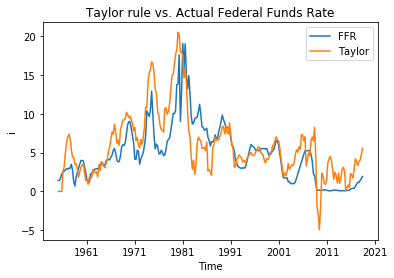

In [4]:
"""
Created on Mon Feb 11 14:34:43 2019

@author: Pau_Belda
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data =pd.read_excel("PS5.xlsx")

quart=pd.to_datetime(data['time'],format='%Y/%d/%m/%h')
data=data[['GDPPOT','GDPC1','FEDFUNDS','CPIAUCSL']]
data.index=pd.DatetimeIndex(quart)

CPI=np.asarray(data[['CPIAUCSL']])
inflation=np.zeros((255))
for i in range(4,255):
    inflation[i]=100*(np.log(CPI[i])-np.log(CPI[i-4]))

GDP=np.asarray(data[['GDPC1']])
GDPP=np.asarray(data[['GDPPOT']])

GDP_gap=np.zeros((255))
for i in range(255):
    GDP_gap[i]=100*(np.log(GDP[i])-np.log(GDPP[i]))

#Taylor rule
i=np.zeros((255))
for t in range(4,255):
    i[t]= 2 + inflation[t] + 0.5*(inflation[t]-2)+ 0.5*GDP_gap[t]

ffr=np.asarray(data[['FEDFUNDS']])
difference=np.zeros((255))
for t in range(255):
    difference[t]= ffr[t]-i[t]

plt.plot(quart[0:255], data[['FEDFUNDS']][0:255], label='FFR')
plt.plot(quart[0:255], i, label= 'Taylor')
plt.xlabel('Time')
plt.ylabel('i')
plt.legend()
plt.title('Taylor rule vs. Actual Federal Funds Rate')
plt.show()

The previous graph plots the Federal Funds Rate and the Taylor's rule interest rate. In general, the Taylor rule mimics pretty well the main movement of the FFR. This is an argument in favour of the Taylor rule as a descriptive device (how the Monetary Policy actually works). 

In the next graph we plot the difference between them. A regime change is observed in 1979 (the big jump in the graph). Before that, the FFR was sistematically lower than the Taylor rule would recommend. In other words, it was a looser policy, which might be a symptom of an expansionary policy to fight the economic disturbances of the 1970s. After Volcker took office in 1979, a much more restrictive policy was applied: the FFR skyrocketed to 20% in June 1981 (coming from about 11% in 1979). It looks like it worked: US inflation, which peaked at 14.8 percent in March 1980, fell below 3 percent by 1983.

During the 90s, specially late 90s and early 2000s, a more relaxed policy was carried out, which might contribute to explain the different episodes of assets bubbles (both the dot com and the housing bubble). Nowadays the Fed would still be running an expansionary policy.(Notice that here we are taking the Taylor rule as a benchmark (kind-of-normative rate)).

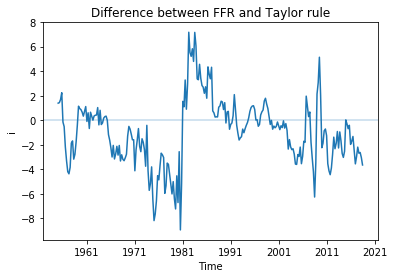

In [5]:
plt.plot(quart[0:255], difference)
plt.title('Difference between FFR and Taylor rule')
plt.axhline(y=0,  linewidth=0.4)
plt.xlabel('Time')
plt.ylabel('i')
plt.show()